In [31]:
import numpy as np 
import scanpy as sc
import pertpy as pt 
import pandas as pd 
import pickle as pkl
import anndata

In [9]:
# figure out how PC loadings are stored 

adata = sc.read_h5ad("zhang_with_PCs.h5ad")

In [5]:
adata.varm['PCs'].shape

# that's the loadings, directly; are one of the dialogue things this for PCs? 

(4000, 50)

In [2]:


pklfile =  "preliminary_results_normalizeTrue_lpsolver_031523.pkl"
f_myfile = open(pklfile, 'rb')
a = pkl.load(f_myfile)  # variables come out in the order you put them in
f_myfile.close()

In [4]:
a.keys()

dict_keys(['mcps', 'ws', 'ct_subs_2', 'pvals', 'tstats'])

In [7]:
a['mcps']['t_Bmem-CD27'].shape
# cells x mcps -- mcp scores

(7283, 10)

In [8]:
a['ws']['t_Bmem-CD27'].shape
# this should be the PC loadings

(50, 10)

In [15]:
gene_loadings =  np.matmul(adata.varm['PCs'], a['ws']['t_Bmem-CD27'])

In [17]:
adata.varm['MCPs'] = gene_loadings

In [18]:
adata.varm

AxisArrays with keys: PCs, MCPs

In [ ]:
sc.pl.pca_loadings(adata, components="MCPs", include_lowest=True, n_points=None, show=None, save=None)

In [43]:
scores = gene_loadings

In [45]:
scores.T.shape

(10, 4000)

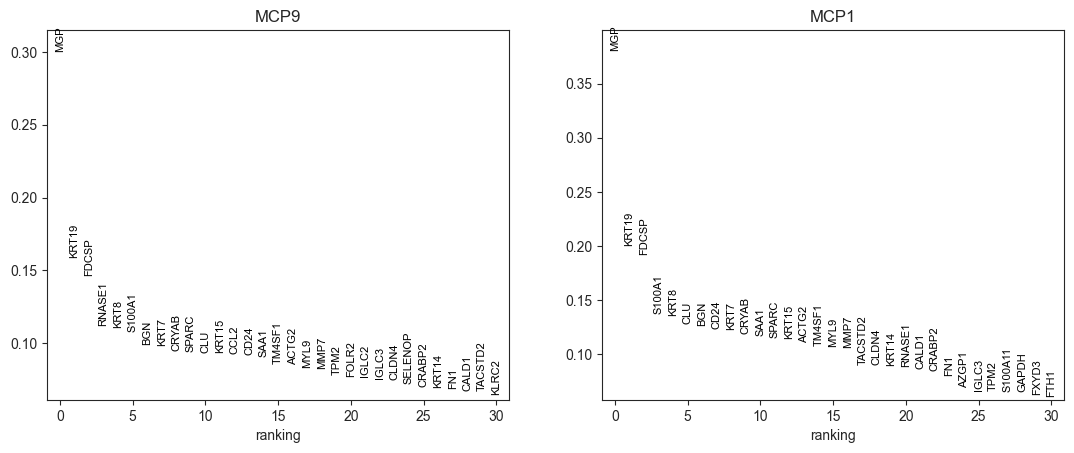

In [51]:
for iscore, score in enumerate(scores.T):
    print(score.shape)
    break

(4000,)


In [56]:
score = scores.T[0,:]
iscore = 0

In [57]:
order_scores = np.argsort(score)[::-1]

In [59]:
n_points = 30
indices = order_scores[: n_points // 2]

In [60]:
indices

array([2415, 2515, 2725, 2150, 1323,  973, 2328,  709, 2420, 2392, 2374,
        622, 2514, 2176, 2212])

In [71]:
adata.varm['MCPs'][:,8]

array([-2.74619292e-02, -4.46993104e-02, -1.48830248e-03, ...,
       -1.87645587e-04,  1.42754590e-04, -8.30916133e-05])

In [73]:
sc.pl._anndata.ranking?

{'t_Bmem-CD27': AnnData object with n_obs × n_vars = 7283 × 4000
     obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9'
     var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
     uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'Sample_colors', 'Treatment_colors', 'Cluster_colors', 'Efficacy_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities',
 't_CD4_Tcm-LMNA': AnnData object with n_obs × n_vars = 3699 × 4000
     obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9'
     var: 'n_cells', 'highly_variable', 'highly_va

t_Bmem-CD27
t_CD4_Tcm-LMNA
t_CD4_Treg-FOXP3
t_CD8_MAIT-KLRB1
t_CD8_Tem-GZMK
t_CD8_Trm-ZNF683
t_Tn-LEF1
t_mono-FCN1
t_pB-IGHG1


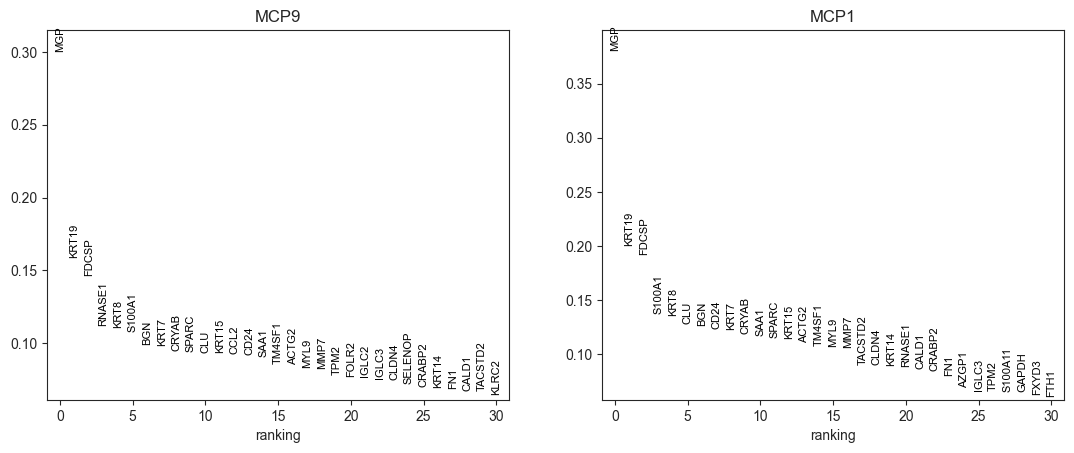

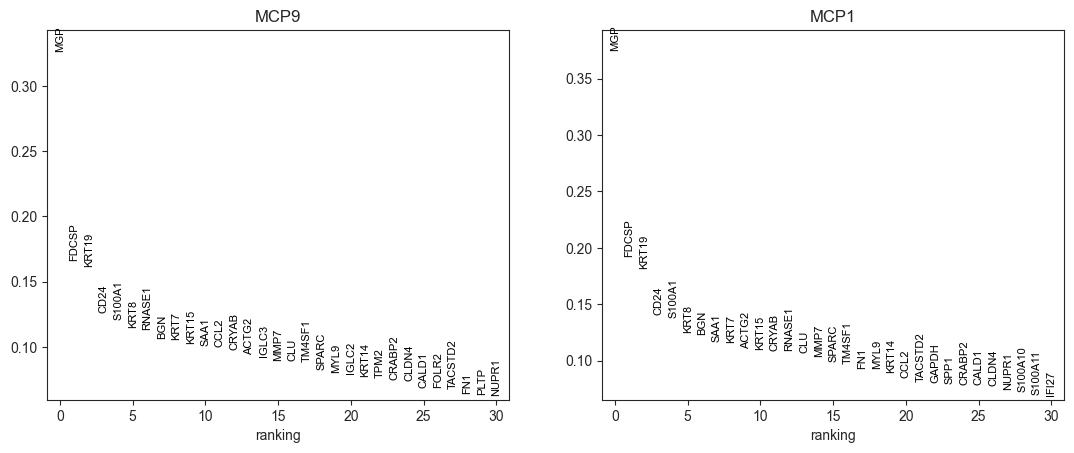

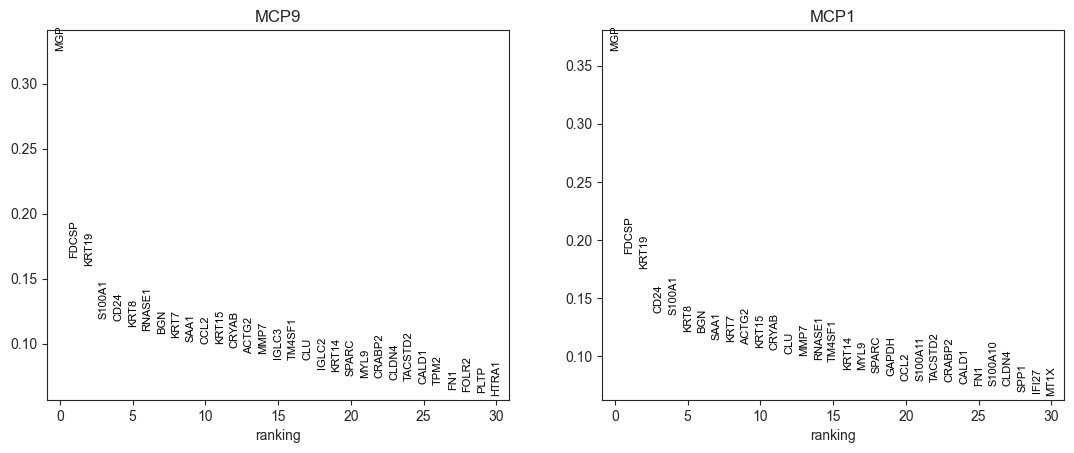

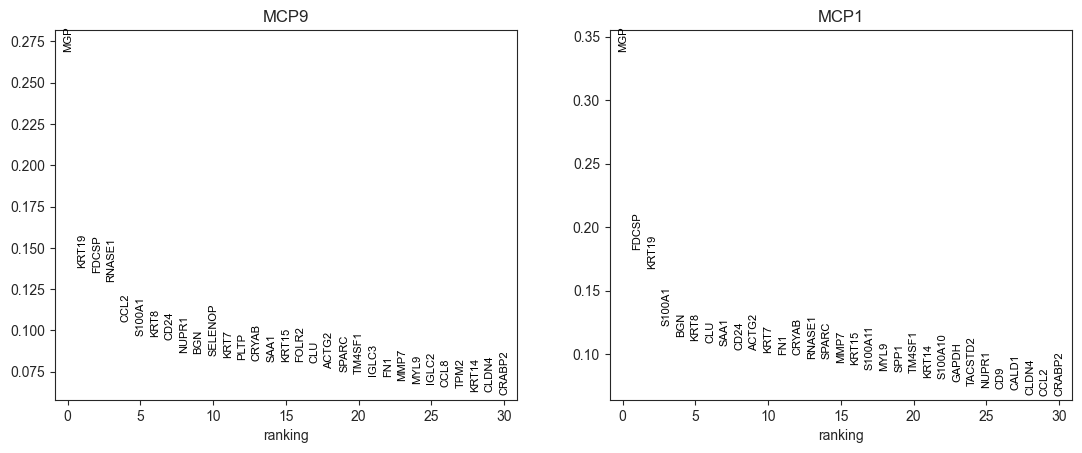

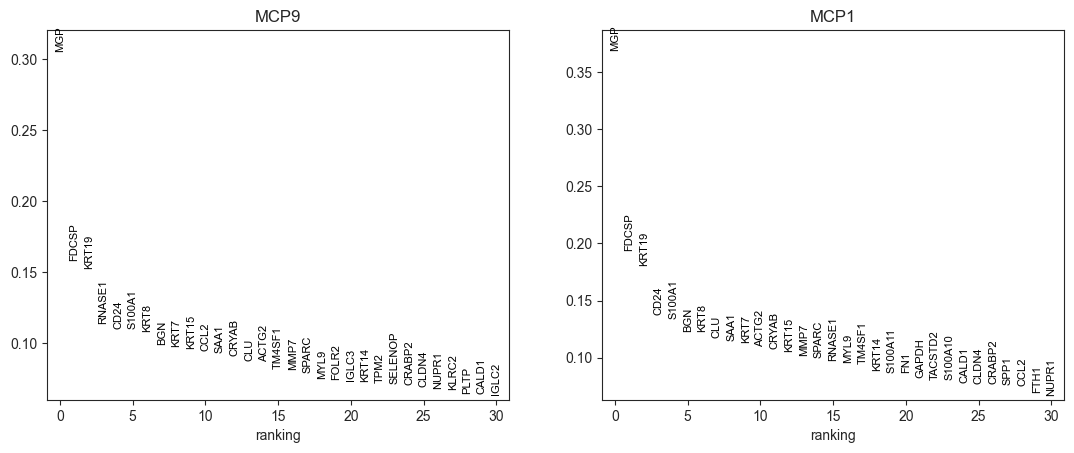

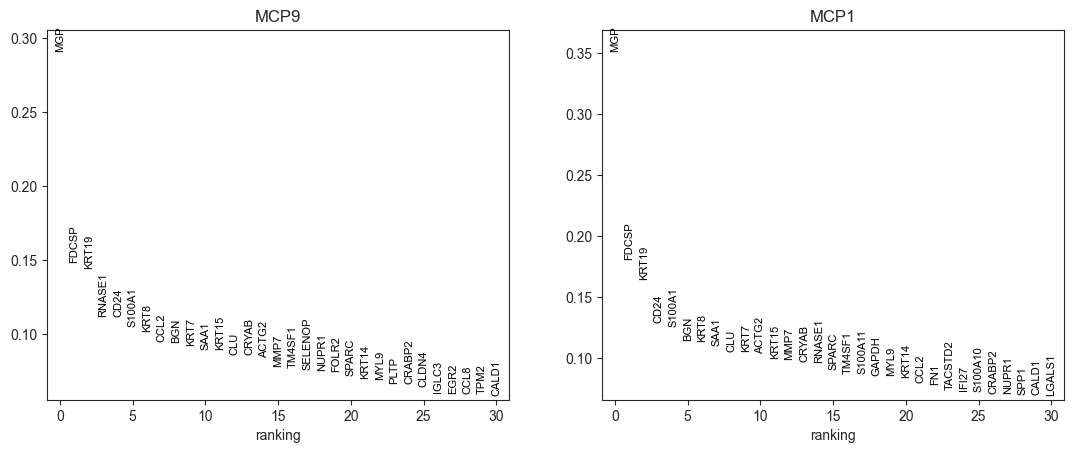

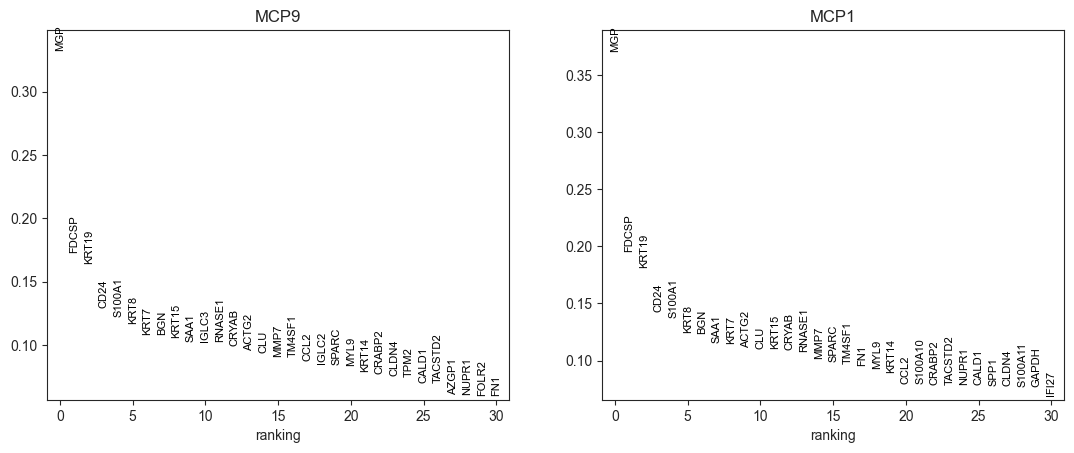

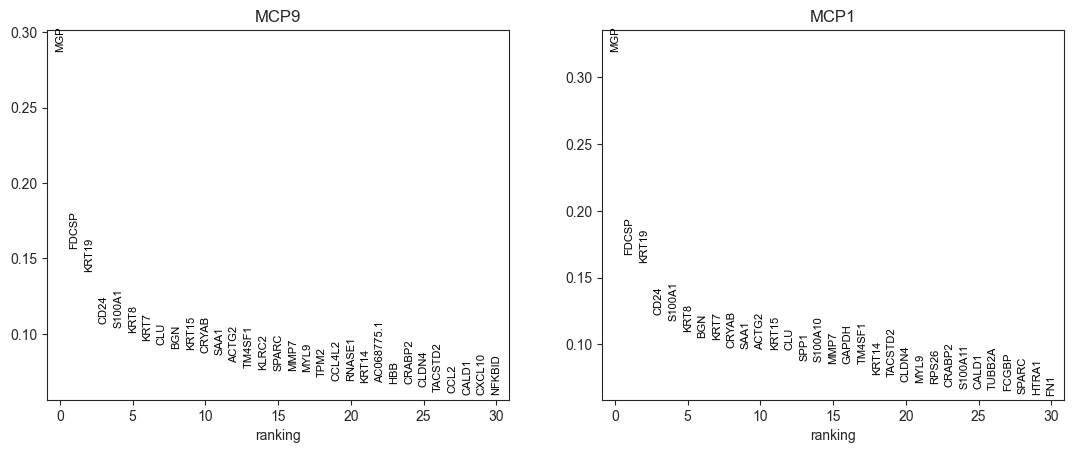

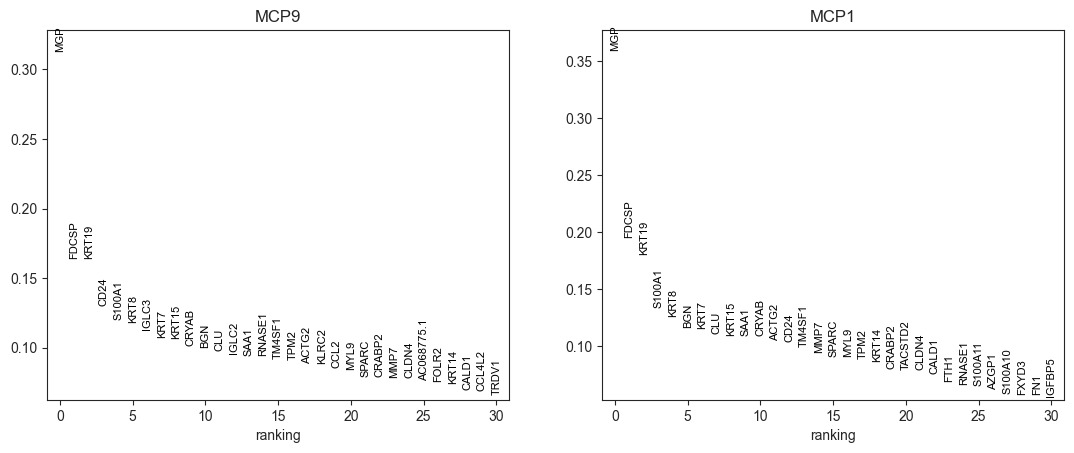

In [115]:
for celltype in a['ct_subs_2'].keys():
    dset=a['ct_subs_2'][celltype]
    dset.varm['MCPs'] =  np.matmul(dset.varm['PCs'], a['ws'][celltype])
    print(celltype)
    sc.pl._anndata.ranking(dset, "varm","MCPs",indices = [8,0], n_points=30)

In [119]:
dset_a = a['ct_subs_2']['t_CD4_Tcm-LMNA']
dset_b =  a['ct_subs_2']['t_Tn-LEF1']
dset_c =  a['ct_subs_2']['t_Bmem-CD27']


In [101]:
(dset_a.varm['PCs'] == dset_b.varm['PCs']).sum()

200000

In [118]:
ws_a = a['ws']['t_CD4_Tcm-LMNA']
ws_b=  a['ws']['t_Tn-LEF1']
ws_c =  a['ws']['t_Bmem-CD27']

In [120]:
dset_a.varm['MCPs']=np.matmul(dset_a.varm['PCs'], ws_a)

In [121]:
dset_b.varm['MCPs']=np.matmul(dset_b.varm['PCs'], ws_b)

In [122]:
dset_c.varm['MCPs']=np.matmul(dset_c.varm['PCs'], ws_c)

In [112]:
dset_a.varm['MCPs']==dset_b.varm['MCPs']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

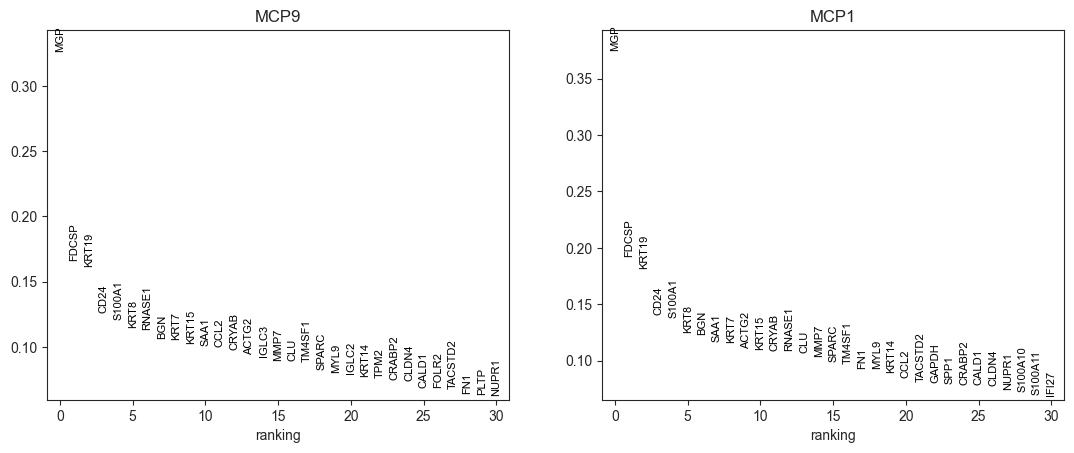

In [123]:
sc.pl._anndata.ranking(dset_a, "varm","MCPs",indices = [8,0], n_points=30)

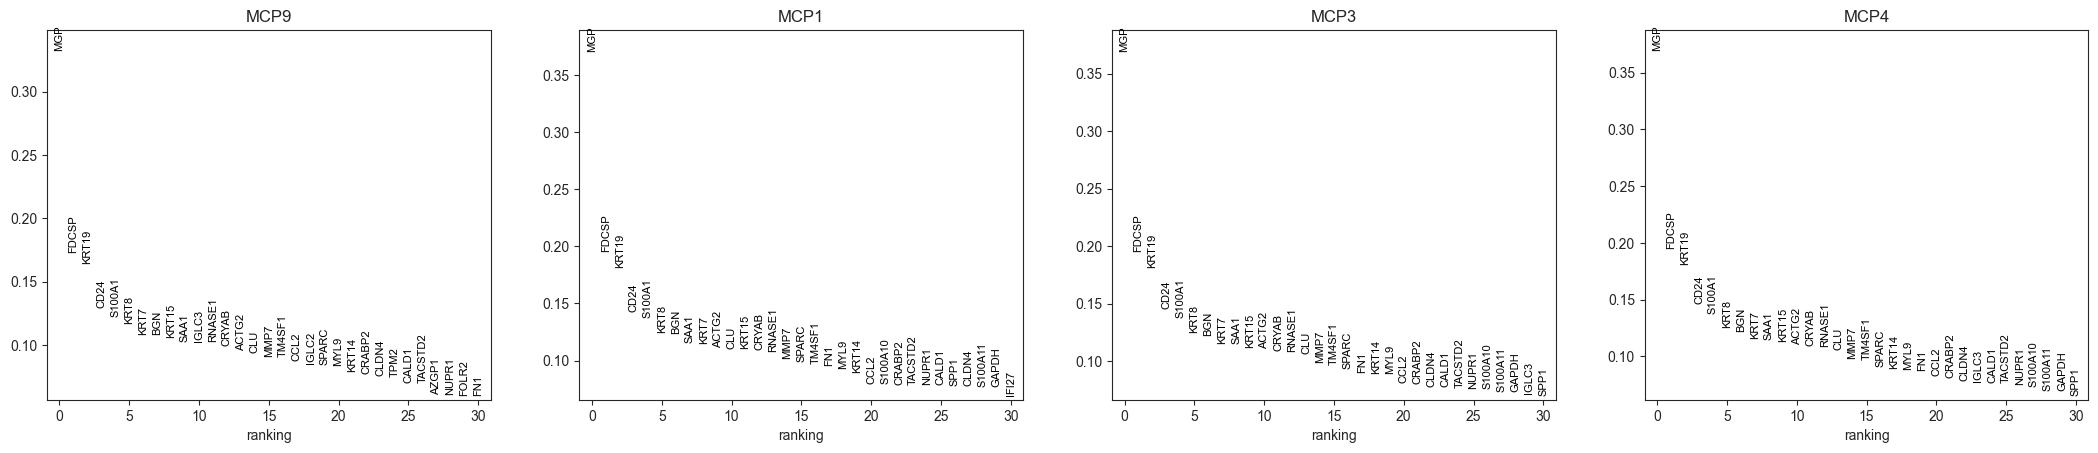

In [126]:
sc.pl._anndata.ranking(dset_b, "varm","MCPs",indices = [8,0, 2,3], n_points=30)

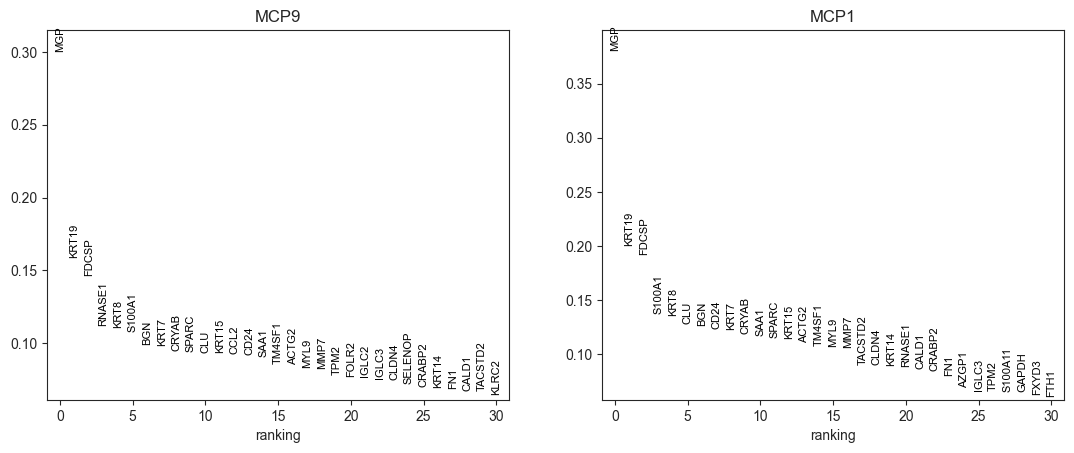

In [125]:
sc.pl._anndata.ranking(dset_c, "varm","MCPs",indices = [8,0], n_points=30)

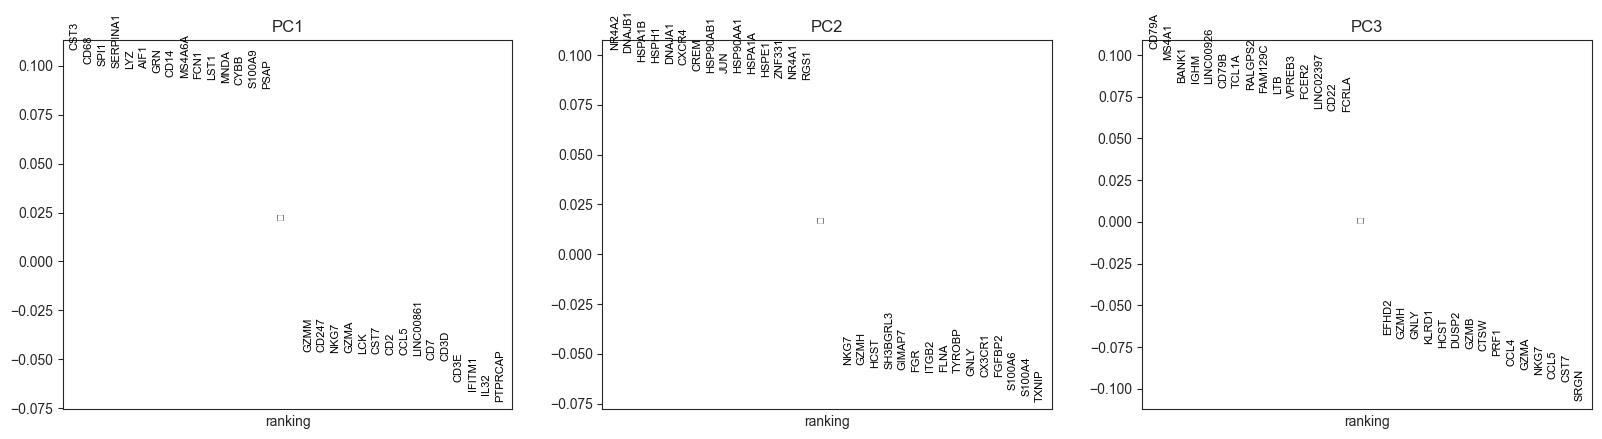

In [127]:
sc.pl.pca_loadings(adata)